**Exploratory Data Analysis:**

This file is composed of components of the EDA process for preliminary exploration of your data. This code is not a complete EDA, but rather a preliminary examination of data. Please see the Table of Contents to explore different areas of EDA.

DataSet link: https://drive.google.com/file/d/1GtwjrZpP6jiZWXyYShiMHBamUstFgaEF/view

he Adult dataset is a widely used standard machine learning dataset, used to explore and demonstrate many machine learning algorithms, both generally and those designed specifically for imbalanced classification.

In [91]:
#importing requirements
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from scipy import stats
filterwarnings("ignore")
%matplotlib inline     
sns.set(color_codes=True)

**Step - 1 - Introduction -&gt; Give a detailed data description and objective**

Explanation: https://drive.google.com/file/d/1rfTR8bgYPSV8LlpPpsMNBTa4FM2LafZ6/view

**Step - 2 - Import the data and display the head, shape and description of the data.**

In [92]:
# read an excel file and convert into a dataframe object
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [94]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Step - 3 - Univariate Analysis -> PDF, Histograms, Boxplots, Countplots, etc..**

1. Understand the probability and frequency distribution of each numerical column

2. Understand the frequency distribution of each categorical Variable/Column

3. Mention observations after each plot 


In [95]:
df.isnull().sum()   # Used to count the null values in rows

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

It shows presence of null value and all the columns are filled

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5c55f5950>,
      dtype=object)

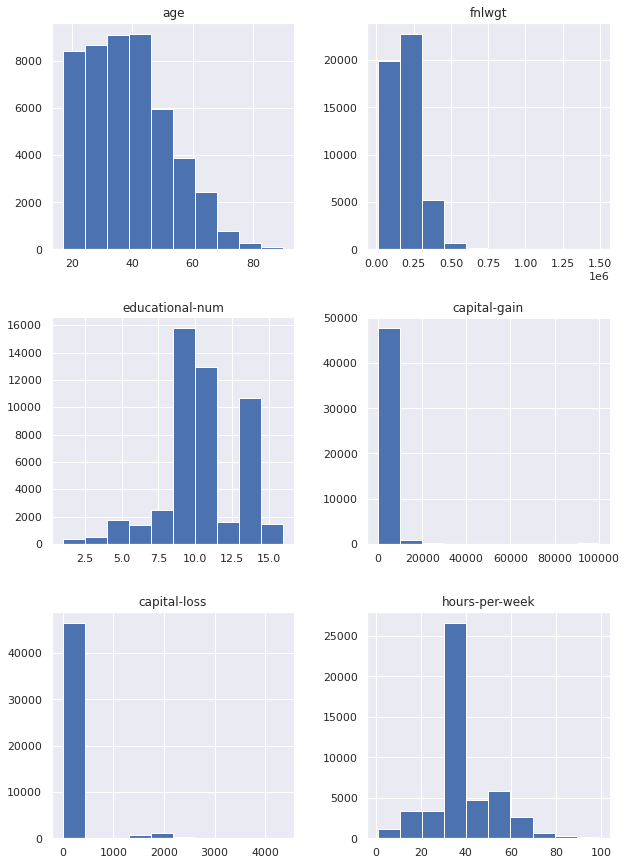

In [96]:
df.hist(figsize = (10, 15))

In [97]:
#finding number of columns has -1 as outliers
col=df.columns
output=[len(df[df[x]=='?'])for x in col]
print(output)

[0, 2799, 0, 0, 0, 0, 2809, 0, 0, 0, 0, 0, 0, 857, 0]


In [98]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [99]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [100]:
df['native-country'].mode()

0    United-States
dtype: object

**We will replace columns which have null values and outliers**

In [101]:
df['workclass']=df['workclass'].replace('?', 'Private') #most occuring value
df['occupation']=df['occupation'].replace('?', 'Prof-specialty') #most occuring value
df['native-country']=df['native-country'].replace('?', 'United-States')

**Segregating numerical and categorical columns**

In [102]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

numeric_data.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [103]:
categorical_data.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

**Replacing NAN Values**

In [104]:
df['relationship']=df['relationship'].replace(np.NAN, df['relationship'].mode) #replacing by most occuring value
df['race']=df['race'].replace(np.NAN, df['race'].mode) #replacing by most occuring value
df['gender']=df['gender'].replace(np.NAN, df['gender'].mode) #replacing by most occuring value
df['capital-gain']=df['capital-gain'].replace(np.NAN, df['capital-gain'].mean) #replacing by mean
df['capital-loss']=df['capital-loss'].replace(np.NAN, df['capital-loss'].mean) #replacing by mean
df['hours-per-week']=df['hours-per-week'].replace(np.NAN, df['hours-per-week'].mean) #replacing by mean
df['native-country']=df['native-country'].replace(np.NAN, df['native-country'].mode) #replacing by most occuring value
df['income']=df['income'].replace(np.NAN, df['income'].mode) #replacing by most occuring value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


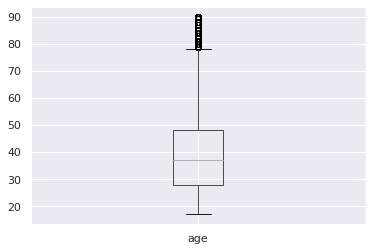

In [105]:
df.boxplot(column=['age'])

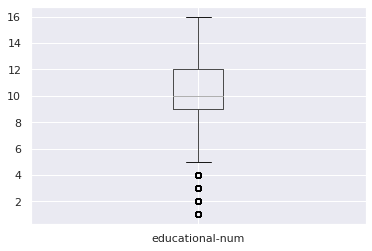

In [106]:
df.boxplot(column=['educational-num'])

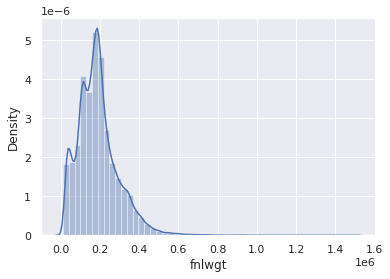

In [107]:
sns.distplot(df['fnlwgt'])


In [108]:
df['income'].value_counts()#it seems that less than 50k most of the salary is

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [109]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


<function matplotlib.pyplot.show(*args, **kw)>

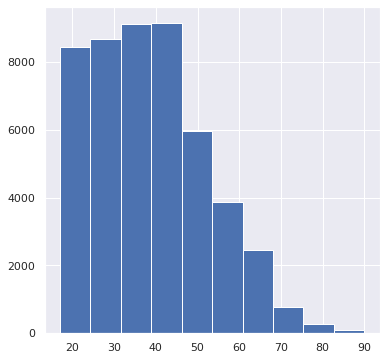

In [110]:
df['age'].hist(figsize = (6,6))
plt.show

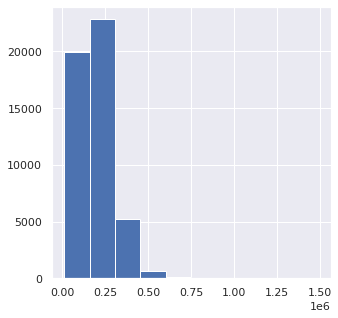

In [111]:
df['fnlwgt'].hist(figsize = (5,5))
plt.show()

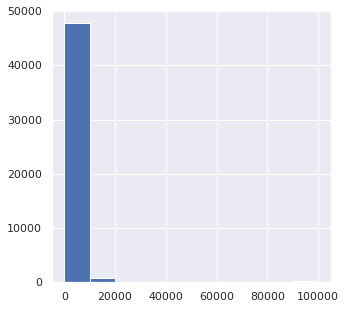

In [112]:
df['capital-gain'].hist(figsize=(5,5))
plt.show()

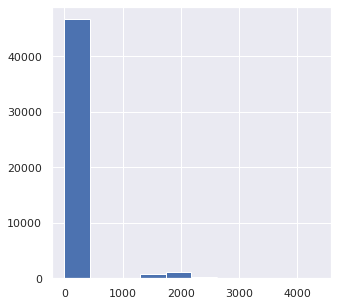

In [113]:
df['capital-loss'].hist(figsize=(5,5))
plt.show()

**Step - 4 - Bivariate Analysis**
- Discover the relationships between numerical columns using Scatter plots, hexbin plots,
pair plots, etc..
- Identify the patterns between categorical and numerical columns using swarmplot,
boxplot, barplot, etc..
- Mention observations after each plot.

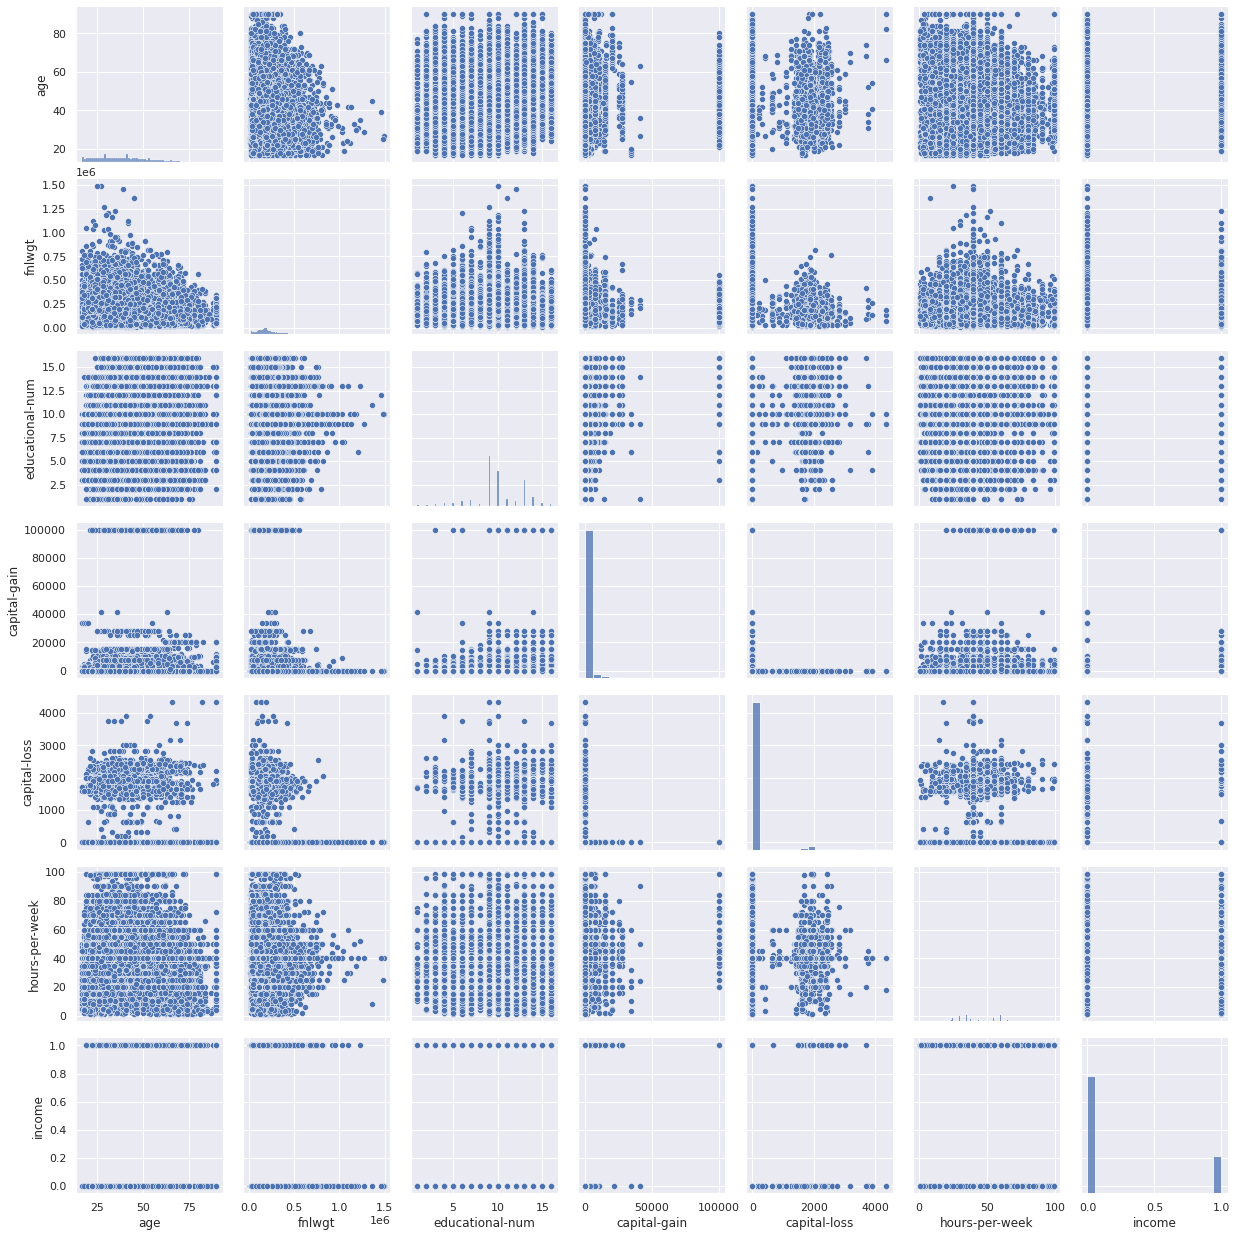

In [114]:
sns.pairplot(df)

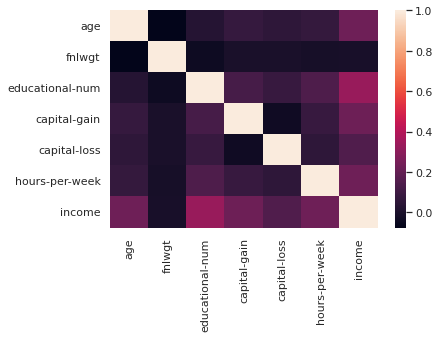

In [115]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

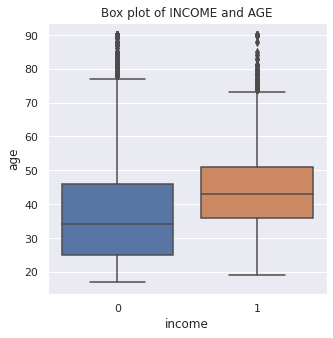

In [116]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='age',data=df).set_title('Box plot of INCOME and AGE')
plt.show()

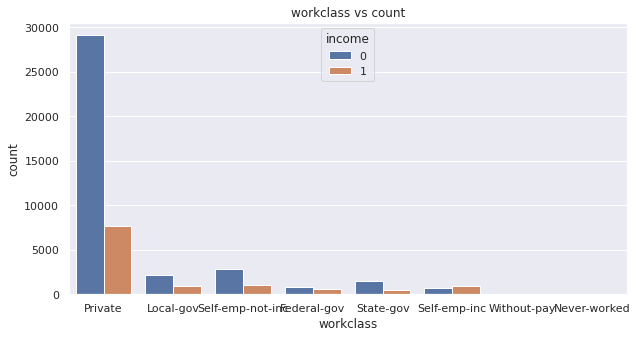

In [117]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue ='income',data=df).set_title("workclass vs count")
plt.show()

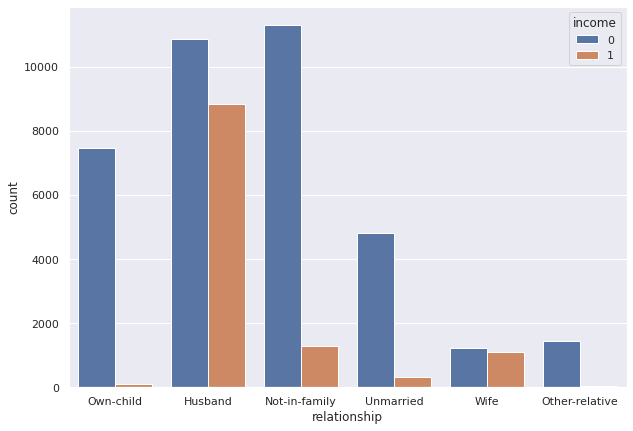

In [118]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",data=df)
plt.show()

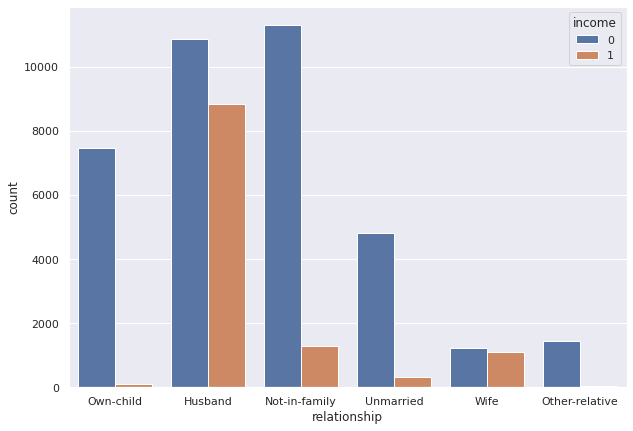

In [119]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",data=df)
plt.show()